In [1]:
import pandas as pd

af = pd.read_csv("Pitt_SpeedBump.csv")

In [2]:
af.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [3]:
#Now removing all NaN values to make analysis easier.

af = af.dropna(axis = 0)

In [4]:
#7 rows needed to be dropped. Now let us sort by neighborhoods.

af = af.sort_values(["neighborhood"], axis = 0)

In [5]:
cols = [i for i in list(af.columns) if i not in ["hump_id", "neighborhood", "locator_street", "public_works_division"]]

In [6]:
af_dropped = af.drop(columns = cols, axis = 1)

In [7]:
af_dropped

,hump_id,locator_street,neighborhood,public_works_division
14,19,Edmond St,Bloomfield,2
12,17,Edmond St,Bloomfield,2
13,18,Edmond St,Bloomfield,2
6,11,Jacob St,Brookline,5
7,12,Jacob St,Brookline,5
...,...,...,...,...
74,75,Mossfield St,Stanton Heights,2
42,43,Webster Ave,Upper Hill,3
44,45,Webster Ave,Upper Hill,3
43,44,Webster Ave,Upper Hill,3


In [8]:
neighborhood_bumps = dict()

for index, row in af_dropped.iterrows():
    if row["neighborhood"] in neighborhood_bumps:
        neighborhood_bumps[row["neighborhood"]] = neighborhood_bumps[row["neighborhood"]] + 1
    else:
        neighborhood_bumps[row["neighborhood"]] = 1
        
print(neighborhood_bumps)

{'Bloomfield': 3, 'Brookline': 4, 'Carrick': 8, 'Garfield': 3, 'Highland Park': 2, 'Homewood South': 4, 'Mount Washington': 3, 'North Oakland': 5, 'Overbrook': 1, 'Perry North': 4, 'Polish Hill': 6, 'South Side Flats': 3, 'South Side Slopes': 4, 'Squirrel Hill South': 17, 'Stanton Heights': 1, 'Upper Hill': 4}


In [9]:
bumpcount = pd.DataFrame(list(neighborhood_bumps.items()), columns = ['neighborhood', '# of bumps'])
bumpcount_sorted = bumpcount.sort_values("# of bumps", ascending = False)
bumpcount_sorted.head(len(bumpcount))

,neighborhood,# of bumps
13,Squirrel Hill South,17
2,Carrick,8
10,Polish Hill,6
7,North Oakland,5
1,Brookline,4
5,Homewood South,4
9,Perry North,4
12,South Side Slopes,4
15,Upper Hill,4
0,Bloomfield,3


<AxesSubplot:xlabel='neighborhood'>

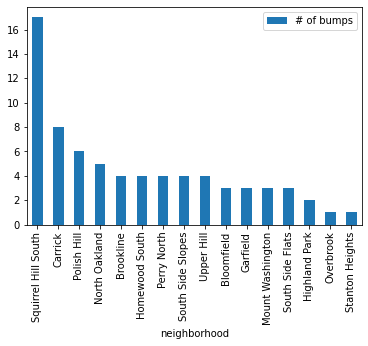

In [10]:
bumpcount_sorted.plot.bar(x = "neighborhood", y = "# of bumps")

In [11]:
least = bumpcount_sorted['neighborhood'].iloc[len(bumpcount_sorted) - 1]
leastnumber = bumpcount_sorted['# of bumps'].iloc[len(bumpcount_sorted) - 1]
print("The neighborhood with the fewest speed bumps is", least, "with", leastnumber, "speed bumps and, therefore, is the least in this category.")

The neighborhood with the fewest speed bumps is Stanton Heights with 1 speed bumps and, therefore, is the least in this category.
